<a href="https://colab.research.google.com/github/GVAmit/ML-notes/blob/main/End%20to%20End%20toy%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd


In [9]:
df = pd.read_csv('/content/placement.csv')

In [10]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [11]:
df = df.iloc[:,1:]

In [13]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [14]:
import matplotlib.pyplot as plt

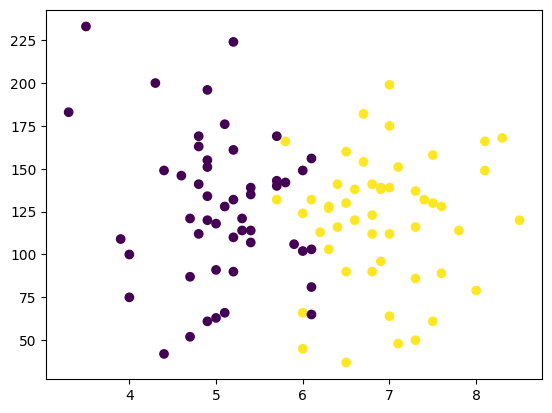

In [16]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [20]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [18]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [21]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

In [29]:
X_train

array([[-1.98269126e-01,  4.48359680e-01],
       [-2.50242586e-02,  5.52847941e-04],
       [ 1.27431225e+00,  1.49821792e-01],
       [ 1.27431225e+00,  8.46410198e-01],
       [ 9.27822513e-01,  6.72263097e-01],
       [-9.77871030e-01,  6.72263097e-01],
       [ 1.53417955e+00, -2.48228726e-01],
       [-5.44758861e-01, -2.48228726e-01],
       [-1.06449346e+00, -2.97985040e-01],
       [-1.23773833e+00,  5.47872310e-01],
       [ 1.36093468e+00,  1.00065477e-01],
       [ 1.27431225e+00, -1.56677107e+00],
       [ 3.21465476e-01,  4.23481523e-01],
       [-7.18003729e-01,  2.48836858e+00],
       [ 4.94710344e-01, -9.89597815e-02],
       [-9.77871030e-01, -9.89597815e-02],
       [ 6.15981751e-02, -1.06920792e+00],
       [ 8.41200079e-01,  3.73725208e-01],
       [-9.77871030e-01,  7.71775726e-01],
       [-8.91248596e-01, -1.48716096e-01],
       [-7.18003729e-01, -3.47741355e-01],
       [-2.84891560e-01,  4.73237838e-01],
       [-7.18003729e-01,  9.21044670e-01],
       [-2.

In [32]:
X_test = scaler.transform(X_test)

In [33]:
X_test

array([[ 0.23484304, -0.52188846],
       [-0.54475886,  0.27421258],
       [-1.06449346,  0.42348152],
       [-1.75747293, -1.21847686],
       [ 0.84120008,  1.26933887],
       [ 0.06159818,  0.19957811],
       [-0.02502426, -1.44238028],
       [-0.63138129, -0.24822873],
       [-1.06449346,  1.12006993],
       [ 0.66795521, -0.8453045 ]])

In [35]:
from sklearn.linear_model import LogisticRegression

In [37]:
clf = LogisticRegression()

In [38]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [44]:
Y_pred = clf.predict(X_test)

In [40]:
Y_test

,placement
98,1
49,0
51,0
68,0
52,1
71,1
45,1
46,0
75,0
35,1


In [41]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(Y_test,Y_pred)

0.9

In [46]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

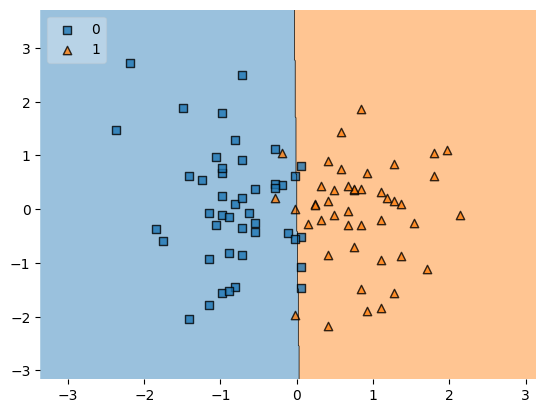

In [47]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend = 2)

In [48]:
import pickle

In [50]:
pickle.dump(clf,open('model.pkl','wb'))